In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_dir = "/content/drive/MyDrive/ucsd/2022/spring/cse291/COVID19 Sera Data/"

In [7]:
df = pd.read_csv(dataset_dir + "important_variant_peptides.tsv", sep="\t")

In [8]:
df

,maestro_column_variant,patient_id,y_covid,variant_ccms_row_73517,variant_ccms_row_57364,variant_ccms_row_42797,variant_ccms_row_74825,variant_ccms_row_57428,variant_ccms_row_100650,variant_ccms_row_81199,...,variant_ccms_row_69576,variant_ccms_row_57224,variant_ccms_row_65519,variant_ccms_row_37262,variant_ccms_row_57518,variant_ccms_row_19409,variant_ccms_row_70221,variant_ccms_row_85302,variant_ccms_row_68028,variant_ccms_row_67571
0,_dyn_#Healthy.HC1.Healthy..HC1.1_intensity_for...,HC1,1,0.638102,0.594220,2.287542,11.851476,4.094602,0.000000,0.000000,...,0.098811,0.250096,3.457948,0.128708,0.000000,0.779253,0.226583,0.265288,0.634103,0.480313
1,_dyn_#Healthy.HC10.Healthy..HC10.1_intensity_f...,HC10,1,1.380685,1.004231,3.168297,9.650905,14.472782,0.363970,3.169787,...,0.096555,0.313441,0.000000,0.539243,0.263105,0.000000,0.238092,0.046747,0.396186,0.810238
2,_dyn_#Healthy.HC12.Healthy..HC12.1_intensity_f...,HC12,1,0.071696,5.128071,0.274528,2.124396,1.093508,0.156005,1.269073,...,0.062409,0.126498,0.000000,0.658676,0.152823,0.000000,0.198969,0.020082,3.591274,0.131683
3,_dyn_#Healthy.HC13.Healthy..HC13.1_intensity_f...,HC13,1,0.135240,0.397327,0.353590,9.426140,3.938592,0.097273,0.627630,...,0.045422,0.112935,0.000000,0.190743,0.000000,0.000000,0.162186,0.018793,0.099972,0.093906
4,_dyn_#Healthy.HC17.Healthy..HC17.1_intensity_f...,HC17,1,0.780187,0.434968,0.627867,23.380932,8.654196,0.919481,0.742804,...,0.361553,1.084437,5.981628,0.179276,0.437705,0.758655,0.810881,0.132831,0.102187,0.416815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,_dyn_#Symptomatic-non-COVID-19.JBDZ5.Symptomat...,JBDZ5,0,0.065978,0.518904,0.171700,0.818074,0.941468,0.147865,0.257547,...,0.052069,0.373615,0.490240,0.221863,0.000000,0.549449,0.496097,0.067258,0.622366,0.214844
79,_dyn_#Symptomatic-non-COVID-19.JBDZ6.Symptomat...,JBDZ6,0,0.085513,0.526770,0.079235,0.623599,0.656439,0.057987,0.087225,...,0.010388,0.370034,0.299206,2.104091,0.298538,1.438371,0.426034,0.068594,0.131856,0.169740
80,_dyn_#Symptomatic-non-COVID-19.JBDZ7.Symptomat...,JBDZ7,0,0.172897,0.739473,0.748578,0.649596,0.941099,0.073564,0.125294,...,0.006960,0.424426,0.000000,0.233197,0.246262,2.425026,0.211883,0.306544,0.502619,0.173774
81,_dyn_#Symptomatic-non-COVID-19.JBDZ8.Symptomat...,JBDZ8,0,0.150494,0.848246,0.385558,0.526410,4.800303,0.162438,0.182562,...,0.011401,0.657849,0.000000,0.134364,0.219024,1.408806,0.285092,0.424315,0.570794,0.189584


In [14]:
cols = list(df.columns)
cols = cols[3:]
cols = [int(x.split("_")[-1]) - 1 for x in cols]
cols

[73516,
 57363,
 42796,
 74824,
 57427,
 100649,
 81198,
 68804,
 91579,
 57515,
 19619,
 44578,
 19270,
 74755,
 20512,
 56123,
 56396,
 15616,
 69575,
 57223,
 65518,
 37261,
 57517,
 19408,
 70220,
 85301,
 68027,
 67570]

In [17]:
prot = pd.read_csv(dataset_dir + "MAESTRO-d6178bdd-identified_variants_merged_protein_regions-main.tsv", sep="\t")
prot

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (259) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,rowid,ccms_row_id,Algorithm,Filename,Cluster_index,Peptide,Unmodified_sequence,Charge,_dyn_#Intensity_for_cluster,_dyn_#Intensity_for_unmodified_sequence,...,PSP_site_match,DrugBank_drugs,Parent_mass,Num_PSP_Drugbank_events,Start_AA_1_based,End_AA_1_based,Num_spectra_for_cluster,Num_spectra_for_unmodified_sequence,Num_spectra_for_peptide_variant,Internal_ref_orig_intensity
0,1,1,.MODA.,specs_ms.mgf,960991,"K.[304.207]GARLIPEMDQIFTEVEMTTLE(K,304.207).V",.GARLIPEMDQIFTEVEMTTLEK.,4,36.905893,36.905893,...,NaN,NaN,1580.81,0,NaN,NaN,1,1,1,8.204159e+03
1,2,2,.MODA.,specs_ms.mgf,763982,"I.[304.207]FTEVEMTTLE(K,304.207).V",.FTEVEMTTLEK.,3,11.686782,11.686782,...,NaN,NaN,1934.91,0,NaN,NaN,1,2,2,4.936894e+05
2,3,3,.MSGFPLUS.,specs_ms.mgf,902201,K.[304.207]LYQPEYQEVSTEEQR.E,.LYQPEYQEVSTEEQR.,3,15.690234,15.690234,...,NaN,NaN,2203.09,0,NaN,NaN,5,6,6,1.951566e+05
3,4,4,.MSGFPLUS.,specs_ms.mgf,935503,"K.[304.207]AANSLEAFIFETQD(K,304.207).L",.AANSLEAFIFETQDK.,3,15.016824,15.016824,...,NaN,NaN,2292.24,0,NaN,NaN,3,4,4,2.877781e+06
4,5,5,.MODA.,specs_ms.mgf,297961,"R.[304.207]YSHDF(N,-56.985)FH.I",.YSHDFNFH.,3,33.768015,33.768015,...,NaN,NaN,1313.66,0,NaN,NaN,3,3,3,7.088440e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101456,101457,101457,.MODA.,specs_ms.mgf,480358,"K.[304.207]YLGE(E,-68.078)YV(K,304.207).A",.YLGEEYVK.,3,15.671927,14.867811,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,1027.56,1,NaN,NaN,2,1072,2,2.338236e+04
101457,101458,101458,.MODA.,specs_ms.mgf,237950,"K.[304.207]YL(G,55.921)EEYV(K,304.207).A",.YLGEEYVK.,4,13.932377,14.867811,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,1664.83,1,NaN,NaN,2,1072,2,5.700355e+04
101458,101459,101459,.MODA.,specs_ms.mgf,1037953,"K.{187.018}[304.207]YLGEEYV(K,304.207).A",.YLGEEYVK.,2,14.412538,14.867811,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,1795.93,1,NaN,NaN,3,1072,3,3.027917e+05
101459,101460,101460,.MODA.,specs_ms.mgf,1022758,"R.[304.207]NTYE(K,361.237)YLGEEYV(K,304.207).A",.NTYEKYLGEEYVK.,3,13.872686,22.237222,...,NaN,|Cisplatin|Isoflurophate|Iron Dextran|Bismuth ...,2605.44,1,NaN,NaN,5,17,8,9.954486e+04


In [18]:
prot = prot.iloc[cols, :]
prot

,rowid,ccms_row_id,Algorithm,Filename,Cluster_index,Peptide,Unmodified_sequence,Charge,_dyn_#Intensity_for_cluster,_dyn_#Intensity_for_unmodified_sequence,...,PSP_site_match,DrugBank_drugs,Parent_mass,Num_PSP_Drugbank_events,Start_AA_1_based,End_AA_1_based,Num_spectra_for_cluster,Num_spectra_for_unmodified_sequence,Num_spectra_for_peptide_variant,Internal_ref_orig_intensity
73516,73517,73517,.MODA.,specs_ms.mgf,1089559,"K.[304.207](T,-13.036)(C,57.021)VADESAEN(C,57....",.TCVADESAENCDK.,2,39.986722,14.274894,...,NaN,NaN,2093.960,0,NaN,NaN,2,8459,34,1.188036e+04
57363,57364,57364,.MODA.,specs_ms.mgf,475608,"K.[304.207]QTALVELV(K,229.166).H",.QTALVELVK.,3,NaN,17.152200,...,NaN,NaN,1533.980,0,NaN,NaN,1,4166,21,0.000000e+00
42796,42797,42797,.MODA.,specs_ms.mgf,339687,"R.{291.173}[304.207]ILGGHLDA(K,304.207).G",.ILGGHLDAK.,4,30.031670,15.017813,...,NaN,NaN,1823.120,0,NaN,NaN,13,1648,13,6.234900e+04
74824,74825,74825,.MODA.,specs_ms.mgf,846931,"R.[304.207](F,-57.06)(K,304.207)DLGEENF(K,304....",.FKDLGEENFK.,3,1142.492491,18.128353,...,NaN,NaN,2082.170,0,NaN,NaN,102,6466,102,1.416522e+05
57427,57428,57428,.MODA.,specs_ms.mgf,419610,"K.[304.207](C,85.056)(C,57.021)TESLVNR.R",.CCTESLVNR.,3,15.040207,13.578053,...,NaN,NaN,1470.740,0,NaN,NaN,7,10668,29,1.411756e+04
100649,100650,100650,.MODA.,specs_ms.mgf,826063,"R.[304.207]FFESFGDLST(P,53.948)DAVMGNP(K,304.2...",.FFESFGDLSTPDAVMGNPK.,4,15.285383,12.375485,...,NaN,NaN,2721.310,0,NaN,NaN,11,344,11,1.735589e+05
81198,81199,81199,.MODA.,specs_ms.mgf,1082064,"K.[304.207]AADDT(W,15.994)EPFASG(K,304.207).T",.AADDTWEPFASGK.,2,14.349766,14.354798,...,NaN,NaN,2019.030,0,NaN,NaN,2,730,45,1.627692e+05
68804,68805,68805,.MSGFPLUS.,specs_ms.mgf,1094512,"-.[304.207](T,43.006)(C,57.021)VADESAEN(C,57.0...",.TCVADESAENCDK.,2,78.443398,14.274894,...,NaN,NaN,2149.980,0,NaN,NaN,7,8459,11,6.056129e+04
91579,91580,91580,.MSGFPLUS.,specs_ms.mgf,949573,"R.[304.207]DETLQDG(C,57.021)DTHF(C,57.021)(K,3...",.DETLQDGCDTHFCK.,3,15.475860,15.475860,...,NaN,"|Antihemophilic factor, human recombinant|Egap...",2334.110,1,NaN,NaN,8,9,9,4.020228e+05
57515,57516,57516,.MODA.,specs_ms.mgf,276794,"K.[304.207](C,335.887)(C,57.021)TESLVNR.R",.CCTESLVNR.,4,12.970466,13.578053,...,NaN,NaN,1291.430,0,NaN,NaN,14,10668,14,3.532935e+04


In [24]:
variant = df.iloc[:, 3:]
variant

,variant_ccms_row_73517,variant_ccms_row_57364,variant_ccms_row_42797,variant_ccms_row_74825,variant_ccms_row_57428,variant_ccms_row_100650,variant_ccms_row_81199,variant_ccms_row_68805,variant_ccms_row_91580,variant_ccms_row_57516,...,variant_ccms_row_69576,variant_ccms_row_57224,variant_ccms_row_65519,variant_ccms_row_37262,variant_ccms_row_57518,variant_ccms_row_19409,variant_ccms_row_70221,variant_ccms_row_85302,variant_ccms_row_68028,variant_ccms_row_67571
0,0.638102,0.594220,2.287542,11.851476,4.094602,0.000000,0.000000,1.721205,0.395295,0.000000,...,0.098811,0.250096,3.457948,0.128708,0.000000,0.779253,0.226583,0.265288,0.634103,0.480313
1,1.380685,1.004231,3.168297,9.650905,14.472782,0.363970,3.169787,0.161007,0.420264,0.101143,...,0.096555,0.313441,0.000000,0.539243,0.263105,0.000000,0.238092,0.046747,0.396186,0.810238
2,0.071696,5.128071,0.274528,2.124396,1.093508,0.156005,1.269073,0.078530,0.291593,0.000000,...,0.062409,0.126498,0.000000,0.658676,0.152823,0.000000,0.198969,0.020082,3.591274,0.131683
3,0.135240,0.397327,0.353590,9.426140,3.938592,0.097273,0.627630,0.130976,0.575835,0.000000,...,0.045422,0.112935,0.000000,0.190743,0.000000,0.000000,0.162186,0.018793,0.099972,0.093906
4,0.780187,0.434968,0.627867,23.380932,8.654196,0.919481,0.742804,1.490490,0.000000,0.000000,...,0.361553,1.084437,5.981628,0.179276,0.437705,0.758655,0.810881,0.132831,0.102187,0.416815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,0.065978,0.518904,0.171700,0.818074,0.941468,0.147865,0.257547,0.083533,0.829641,0.000000,...,0.052069,0.373615,0.490240,0.221863,0.000000,0.549449,0.496097,0.067258,0.622366,0.214844
79,0.085513,0.526770,0.079235,0.623599,0.656439,0.057987,0.087225,0.000000,1.009536,0.072533,...,0.010388,0.370034,0.299206,2.104091,0.298538,1.438371,0.426034,0.068594,0.131856,0.169740
80,0.172897,0.739473,0.748578,0.649596,0.941099,0.073564,0.125294,0.000000,0.000000,0.121627,...,0.006960,0.424426,0.000000,0.233197,0.246262,2.425026,0.211883,0.306544,0.502619,0.173774
81,0.150494,0.848246,0.385558,0.526410,4.800303,0.162438,0.182562,0.000000,0.000000,0.000000,...,0.011401,0.657849,0.000000,0.134364,0.219024,1.408806,0.285092,0.424315,0.570794,0.189584


In [45]:
impt = [(73516, 21),
 (57363, 17),
 (42796, 15),
 (74824, 15),
 (57427, 15),
 (100649, 13),
 (81198, 13),
 (68804, 11),
 (91579, 11),
 (57515, 10),
 (19619, 9),
 (44578, 7),
 (19270, 7),
 (74755, 6),
 (20512, 5),
 (56123, 4),
 (56396, 3),
 (15616, 3),
 (69575, 3),
 (57223, 2),
 (65518, 2),
 (37261, 2),
 (57517, 1),
 (19408, 1),
 (70220, 1),
 (85301, 1),
 (68027, 1),
 (67570, 1)]

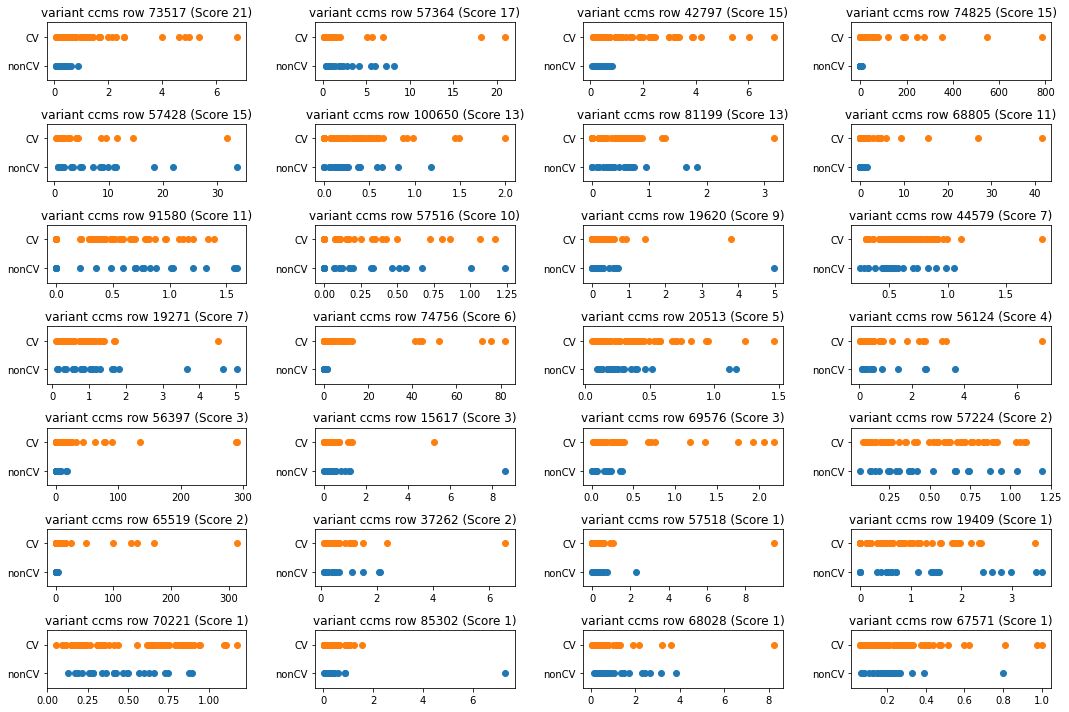

In [64]:
fig, axs = plt.subplots(7, 4, figsize=(15, 10))
for i, col in enumerate(variant):
  ax = axs[i // 4][i % 4]
  # ax.figure(figsize=(5, 1))
  ax.set_title(f"variant ccms row {col.split('_')[-1]} (Score {impt[i][1]})")
  ax.scatter(variant[col][df["y_covid"] == 0], df["y_covid"][df["y_covid"] == 0])
  ax.scatter(variant[col][df["y_covid"] == 1], df["y_covid"][df["y_covid"] == 1])
  ax.set_yticks([0, 1])
  ax.set_yticklabels(["nonCV", "CV"])
  ax.set_ylim([-0.5, 1.5])
fig.tight_layout()
plt.show()